# Salary prediction 

### import librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Dataset Overview:


The dataset contains the following columns:


 `FIRST NAME`: First name


 `LAST NAME`: Last name


 `SEX`: Gender


 `DOJ`: Date of joining the company


 `CURRENT DATE`: Current date of data


 `DESIGNATION`: Job role/designation


 `AGE`: Age


 `SALARY`: Target variable, the salary of the data professional


 `UNIT`: Business unit or department


 `LEAVES USED`: Number of leaves used


 `LEAVES REMAINING`: Number of leaves remaining


 `RATINGS`: Ratings or performance ratings


 `PAST EXP`: Past work experience

## Exploratory Data Analysis (EDA)

#### loading dataset

In [2]:
data = pd.read_csv("Salary Prediction of Data Professions.csv")

In [3]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
data.tail()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [5]:
data.shape

(2639, 13)

### overview


In [6]:
data.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [7]:
data.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

### data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


### describe data

In [9]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


### Cleaning Data

In [10]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [11]:
data.duplicated().sum()

161

In [12]:
data[data.duplicated()]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
104,CARI,ARENALES,F,04-10-2014,01-07-2016,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5
248,BOBBIE,AIDT,M,6-29-2013,01-07-2016,Senior Analyst,25.0,68505,Operations,15.0,15.0,3.0,1
400,JUAN,ABBASSI,M,07-01-2013,01-07-2016,Senior Analyst,27.0,61575,Finance,20.0,10.0,2.0,1
422,JODIE,ANIELLO,F,10-29-2014,01-07-2016,Analyst,24.0,43137,IT,27.0,3.0,2.0,2
446,ALEX,ABOLAFIA,M,11-10-2013,01-07-2016,Analyst,25.0,43352,Finance,27.0,3.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,ROMEO,AINSLEY,M,11-20-2014,01-07-2016,Analyst,23.0,41052,IT,15.0,15.0,5.0,1
2591,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
2600,SHEREE,APPEL,F,9-24-2013,01-07-2016,Analyst,25.0,49559,Management,22.0,8.0,5.0,2
2624,JOSPEH,ALLIS,M,2-26-2014,01-07-2016,Analyst,22.0,45364,Web,20.0,10.0,2.0,0


In [13]:
data.drop_duplicates(keep='first', inplace=True)

In [14]:
data.duplicated().sum()

0

### Handling Missing Values

In [15]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [16]:
data[data.isnull().any(axis=1)]


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
5,VICTORIA,NaN,F,2-19-2013,01-07-2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
7,JACQUES,AKMAL,M,12-05-2013,01-07-2016,Analyst,NaN,40058,Marketing,29.0,1.0,2.0,2
11,VIRGIL,ACKIES,M,02-01-2010,01-07-2016,Senior Manager,36.0,160613,Finance,NaN,11.0,2.0,9
15,CORINNE,ANDRZEJCZYK,F,8-13-2014,01-07-2016,Analyst,21.0,44812,IT,16.0,NaN,5.0,0
19,PHILLIP,ABDULA,M,07-03-2013,01-07-2016,Analyst,24.0,44665,Web,NaN,12.0,5.0,0
23,WENDI,APPERT,F,12-02-2013,01-07-2016,Analyst,25.0,43920,Web,28.0,NaN,2.0,2


In [17]:
# Fill missing values in numerical columns with the mean
numerical_cols = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

In [18]:
categorical_cols = ['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'UNIT']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
data[data.isnull().any(axis=1)]


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1,ANNIE,ALMANZA,F,NaN,01-07-2016,Associate,24.727273,89207,Web,22.493737,13.0,3.481826,7


In [20]:
data['DOJ'] = pd.to_datetime(data['DOJ'], errors='coerce')

earliest_date = data['DOJ'].min()

data['DOJ'] = data['DOJ'].fillna(earliest_date)

In [21]:
data[data.isnull().any(axis=1)]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP


In [22]:
data.iloc[[1, 4, 5, 7, 11,15, 19, 23]]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1,ANNIE,ALMANZA,F,2009-01-23,01-07-2016,Associate,24.727273,89207,Web,22.493737,13.000000,3.481826,7
4,LEON,ABOULAHOUD,M,2014-11-20,01-07-2016,Analyst,24.727273,43161,Operations,27.000000,3.000000,3.481826,3
5,VICTORIA,ALMANZA,F,2013-02-19,01-07-2016,Analyst,22.000000,48736,Marketing,20.000000,10.000000,4.000000,0
7,JACQUES,AKMAL,M,2013-12-05,01-07-2016,Analyst,24.727273,40058,Marketing,29.000000,1.000000,2.000000,2
11,VIRGIL,ACKIES,M,2010-02-01,01-07-2016,Senior Manager,36.000000,160613,Finance,22.493737,11.000000,2.000000,9
15,CORINNE,ANDRZEJCZYK,F,2014-08-13,01-07-2016,Analyst,21.000000,44812,IT,16.000000,7.511309,5.000000,0
19,PHILLIP,ABDULA,M,2013-07-03,01-07-2016,Analyst,24.000000,44665,Web,22.493737,12.000000,5.000000,0
23,WENDI,APPERT,F,2013-12-02,01-07-2016,Analyst,25.000000,43920,Web,28.000000,7.511309,2.000000,2


### Visualization

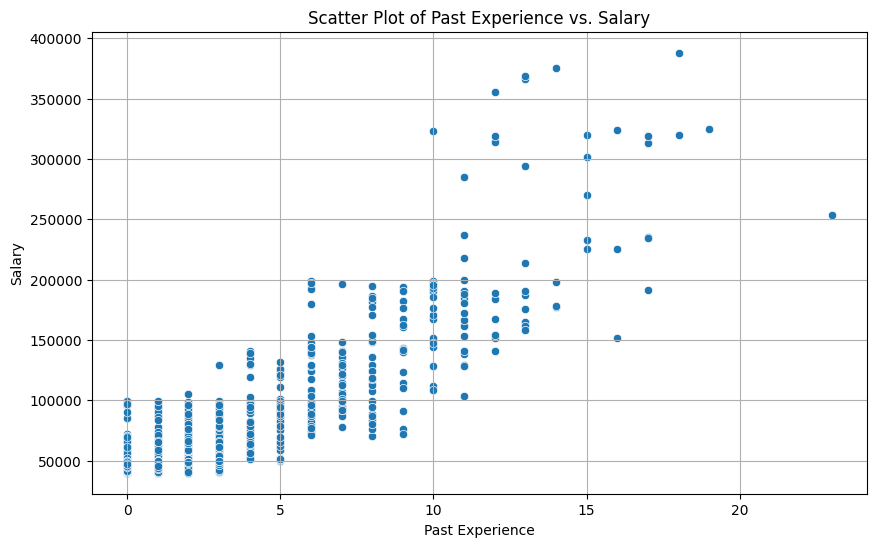

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', data=data)
plt.title('Scatter Plot of Past Experience vs. Salary')
plt.xlabel('Past Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

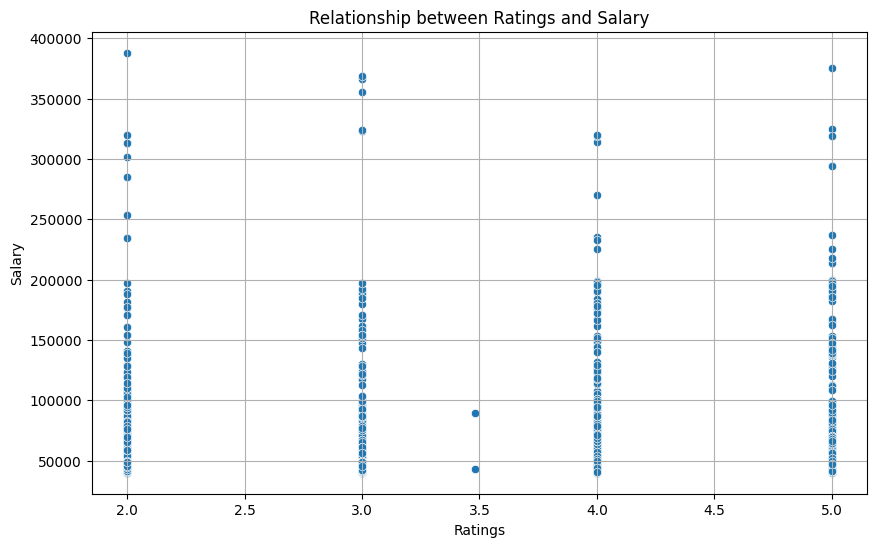

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RATINGS', y='SALARY', data=data)
plt.title('Relationship between Ratings and Salary')
plt.xlabel('Ratings')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

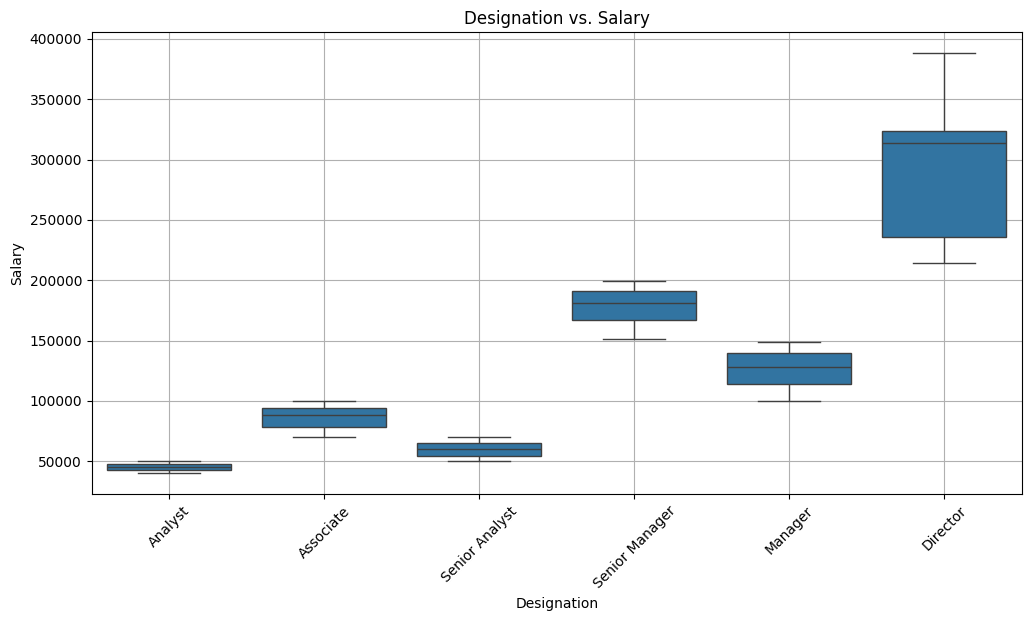

In [25]:
# Box plot of 'DESIGNATION' with 'SALARY'
plt.figure(figsize=(12, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=data)
plt.title('Designation vs. Salary')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


C:\Users\miree\AppData\Local\Temp\ipykernel_46012\3308494492.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SEX', y='SALARY', data=data, ci=None, palette=custom_palette)
C:\Users\miree\AppData\Local\Temp\ipykernel_46012\3308494492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEX', y='SALARY', data=data, ci=None, palette=custom_palette)


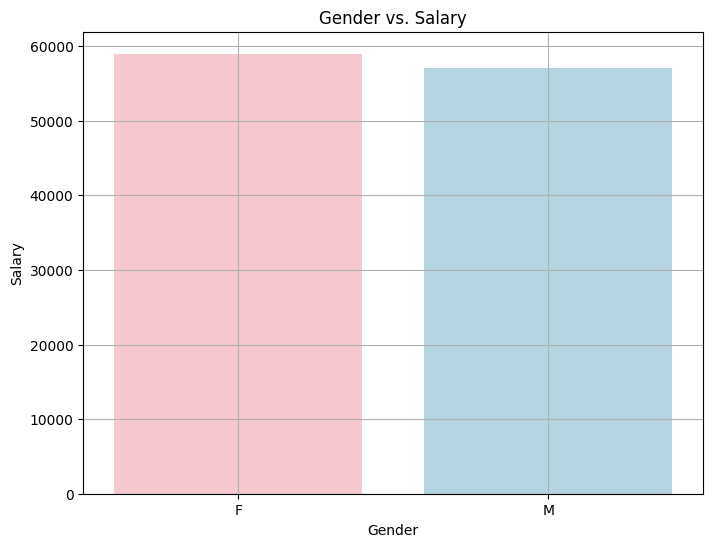

In [26]:
custom_palette = {'M': 'lightblue', 'F': 'pink'}

# Bar plot of 'SEX' with 'SALARY'
plt.figure(figsize=(8, 6))
sns.barplot(x='SEX', y='SALARY', data=data, ci=None, palette=custom_palette)  
# ci=None removes error bars
plt.title('Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

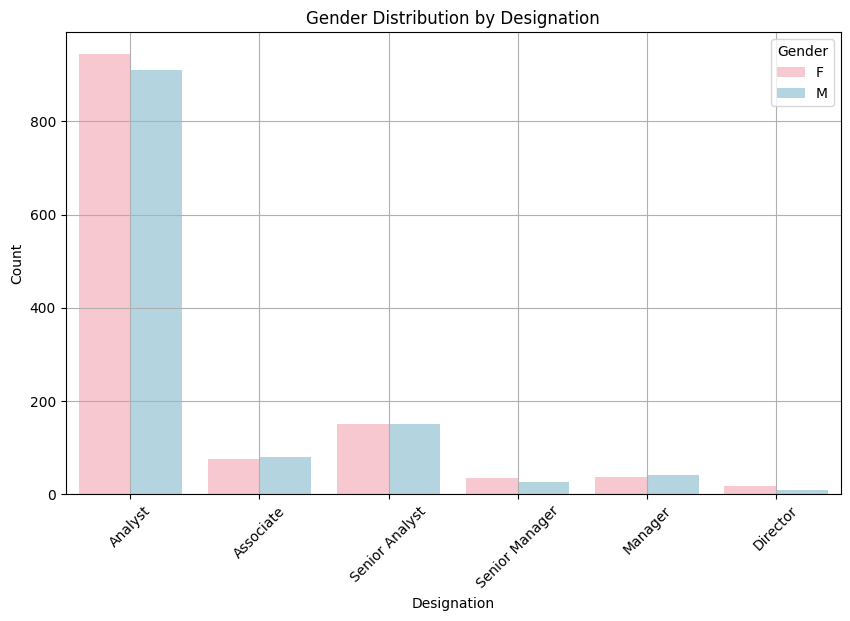

In [27]:
# Define custom color palette
custom_palette = {'M': 'lightblue', 'F': 'pink'}

# Count plot of 'DESIGNATION' with 'SEX'
plt.figure(figsize=(10, 6))
sns.countplot(x='DESIGNATION', hue='SEX', data=data, palette=custom_palette)
plt.title('Gender Distribution by Designation')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


## Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["SEX"] = label_encoder.fit_transform(data["SEX"])

In [29]:
data["SEX"]

0       0
1       0
2       0
3       0
4       1
       ..
2634    0
2635    0
2636    0
2637    0
2638    1
Name: SEX, Length: 2478, dtype: int32

In [30]:
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include='number')
std_scaler = StandardScaler()
data[numeric_data.columns] = std_scaler.fit_transform(numeric_data)

## Model Development

##### splitiong data

In [31]:
from sklearn.model_selection import train_test_split

x = data[['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'DESIGNATION', 'AGE', 'UNIT', 'CURRENT DATE','LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']]
y = data['SALARY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### seperate features and target variable 

In [32]:
X = data.drop('SALARY', axis=1)
y = data['SALARY']

In [33]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [36]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [38]:
# =evaluate the linear regression model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', LinearRegression())])

##### Train model

In [39]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SEX', 'AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['FIRST NAME', 'LAST NAME', 'CURRENT DATE', 'DESIGNATION', 'UNIT'], dtype='object'))])),
                ('model', LinearRegression())])

##### prediction 

In [40]:
y_pred = model.predict(X_test)

##### Evaluate model


In [41]:
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

##### print the result 

In [42]:
print("Linear Regression Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}\n")

Linear Regression Performance:
MAE: 0.11006796358300115
MSE: 0.022661484354388656
RMSE: 0.1505373188096183
R2: 0.9641921424451538

